# 8 | Anomaly Detection and Collaborative Filtering
## 8.2 Collaborative Filtering

In [3]:
# import key libraries (remember to pip install numpy etc. first)
import numpy as np
import sys
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline

## Part 1: Loading movie ratings dataset

In [6]:
# import csv data
PATH="./data/"
DATA="ex8_movies.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y
Y = mat['Y']
R = mat['R']

In [18]:
print(f'Average rating for movie 1 (Toy Story): {np.mean(Y[0,np.argwhere(R[0,:]==1)])} / 5\n\n')

Average rating for movie 1 (Toy Story): 3.8783185840707963 / 5




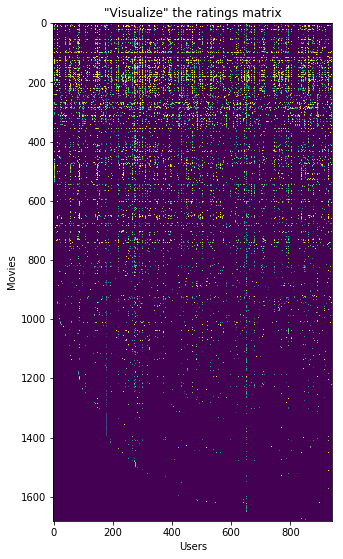

In [37]:
#f = plt.figure()
#wspace=None, hspace=None
#ax = f.add_subplot(1, 1, 1)
plt.figure(figsize=(5,12))
plt.imshow(Y)
plt.title('"Visualize" the ratings matrix')
plt.ylabel('Movies');
plt.xlabel('Users');

## Part 2: Collaborative Filtering Cost Function

In [41]:
# import csv data
PATH="./data/"
DATA="ex8_movieParams.mat"

import scipy.io
mat = scipy.io.loadmat(f'{PATH}{DATA}') # training data stored in arrays X, y

In [44]:
X=mat['X']
Theta=mat['Theta']
num_users=mat['num_users'].ravel()
num_movies=mat['num_movies'].ravel()
num_features=mat['num_features'].ravel()
X.shape, Theta.shape, num_users, num_movies, num_features

((1682, 10),
 (943, 10),
 array([943], dtype=uint16),
 array([1682], dtype=uint16),
 array([10], dtype=uint8))

In [57]:
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):
    #COFICOSTFUNC Collaborative filtering cost function
    #   [J, grad] = COFICOSTFUNC(params, Y, R, num_users, num_movies, ...
    #   num_features, lambda) returns the cost and gradient for the
    #   collaborative filtering problem.

    # Unfold the U and W matrices from params
    X = params[0:num_movies*num_features].reshape((num_movies, num_features))
    Theta = params[num_movies*num_features:].reshape((num_users, num_features))
    # You need to return the following values correctly
    J = 0
    X_grad = np.zeros(X.shape)
    Theta_grad = np.zeros(Theta.shape)

    error = (X@Theta.T - Y)*R
    regularization = Lambda/2 * (np.sum(np.sum(Theta**2))+sum(sum(X**2)))


    J = 0.5 * sum(sum(error**2)) + regularization

    X_grad = error@Theta + Lambda*X
    Theta_grad = error.T@X + Lambda*Theta

    grad = np.r_[X_grad.ravel(), Theta_grad.ravel()]

    return J, grad

In [60]:
#  Reduce the data set size so that this runs faster
num_users = 4
num_movies = 5
num_features = 3
X = X[0:num_movies, 0:num_features]
Theta = Theta[0:num_users, 0:num_features]
Y = Y[0:num_movies, 0:num_users]
R = R[0:num_movies, 0:num_users]

#  Evaluate cost function
J, grad = cofiCostFunc(np.r_[X.ravel(), Theta.ravel()], Y, R, num_users, num_movies, num_features, 0)

print(f'Cost at loaded parameters: {J}\n(this value should be about 22.22)\n')
J

Cost at loaded parameters: 22.22460372568567
(this value should be about 22.22)



22.22460372568567

## Part 3: Collaborative Filtering Gradient

In [ ]:
def checkCostFunction(Lambda = 0)
#CHECKCOSTFUNCTION Creates a collaborative filering problem 
#to check your cost function and gradients
#   CHECKCOSTFUNCTION(Lambda) Creates a collaborative filering problem 
#   to check your cost function and gradients, it will output the 
#   analytical gradients produced by your code and the numerical gradients 
#   (computed using computeNumericalGradient). These two gradient 
#   computations should result in very similar values.

# Create small problem
X_t = np.random.rand(4, 3)
Theta_t = np.random.rand(5, 3)

# Zap out most entries
Y = X_t @ Theta_t.T
Y[np.random.rand(Y.shape) > 0.5] = 0
R = np.zeros(Y.shape)
R[Y ~= 0] = 1

# Run Gradient Checking
X = randn(size(X_t));
Theta = randn(size(Theta_t));
num_users = size(Y, 2);
num_movies = size(Y, 1);
num_features = size(Theta_t, 2);

numgrad = computeNumericalGradient( ...
                @(t) cofiCostFunc(t, Y, R, num_users, num_movies, ...
                                num_features, lambda), [X(:); Theta(:)]);

[cost, grad] = cofiCostFunc([X(:); Theta(:)],  Y, R, num_users, ...
                          num_movies, num_features, lambda);

disp([numgrad grad]);
fprintf(['The above two columns you get should be very similar.\n' ...
         '(Left-Your Numerical Gradient, Right-Analytical Gradient)\n\n']);

diff = norm(numgrad-grad)/norm(numgrad+grad);
fprintf(['If your cost function implementation is correct, then \n' ...
         'the relative difference will be small (less than 1e-9). \n' ...
         '\nRelative Difference: %g\n'], diff);
